In [4]:
import os
import sys
import json
from pathlib import Path
sys.path.append(os.path.abspath('..'))



from pathlib import Path
from tqdm.auto import tqdm

import cv2
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# ============== Models ============== 
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights
import supervision as sv # tracker 
# shut down loggings
import logging
logging.getLogger("ultralytics").setLevel(logging.ERROR)

# ----------- local imports ----------- 
from utils import show_images, get_frame, get_frame_test, get_info_from_seqinfo
from constants import TRAIN_PATH, TEST_PATH
from dataset import df_train, get_vid_img_path, get_vid_gt_path
from FasterRcnn.inference import *
from FasterRcnn.CustomDataset import CustomDataset, collate_fn

# ----------- model imports ----------- 
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = torch.Generator(device=device).manual_seed(42)
dtype = torch.float32
device

device(type='cuda')

In [5]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))

# Try on 1 Batch

In [6]:
xb = next(iter(dataloader))

In [7]:
model  = fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT).to(device).type(dtype)

In [9]:
checkpoint = torch.load("../../models/fastrcnn_overfit_128_4.pth")

In [11]:
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

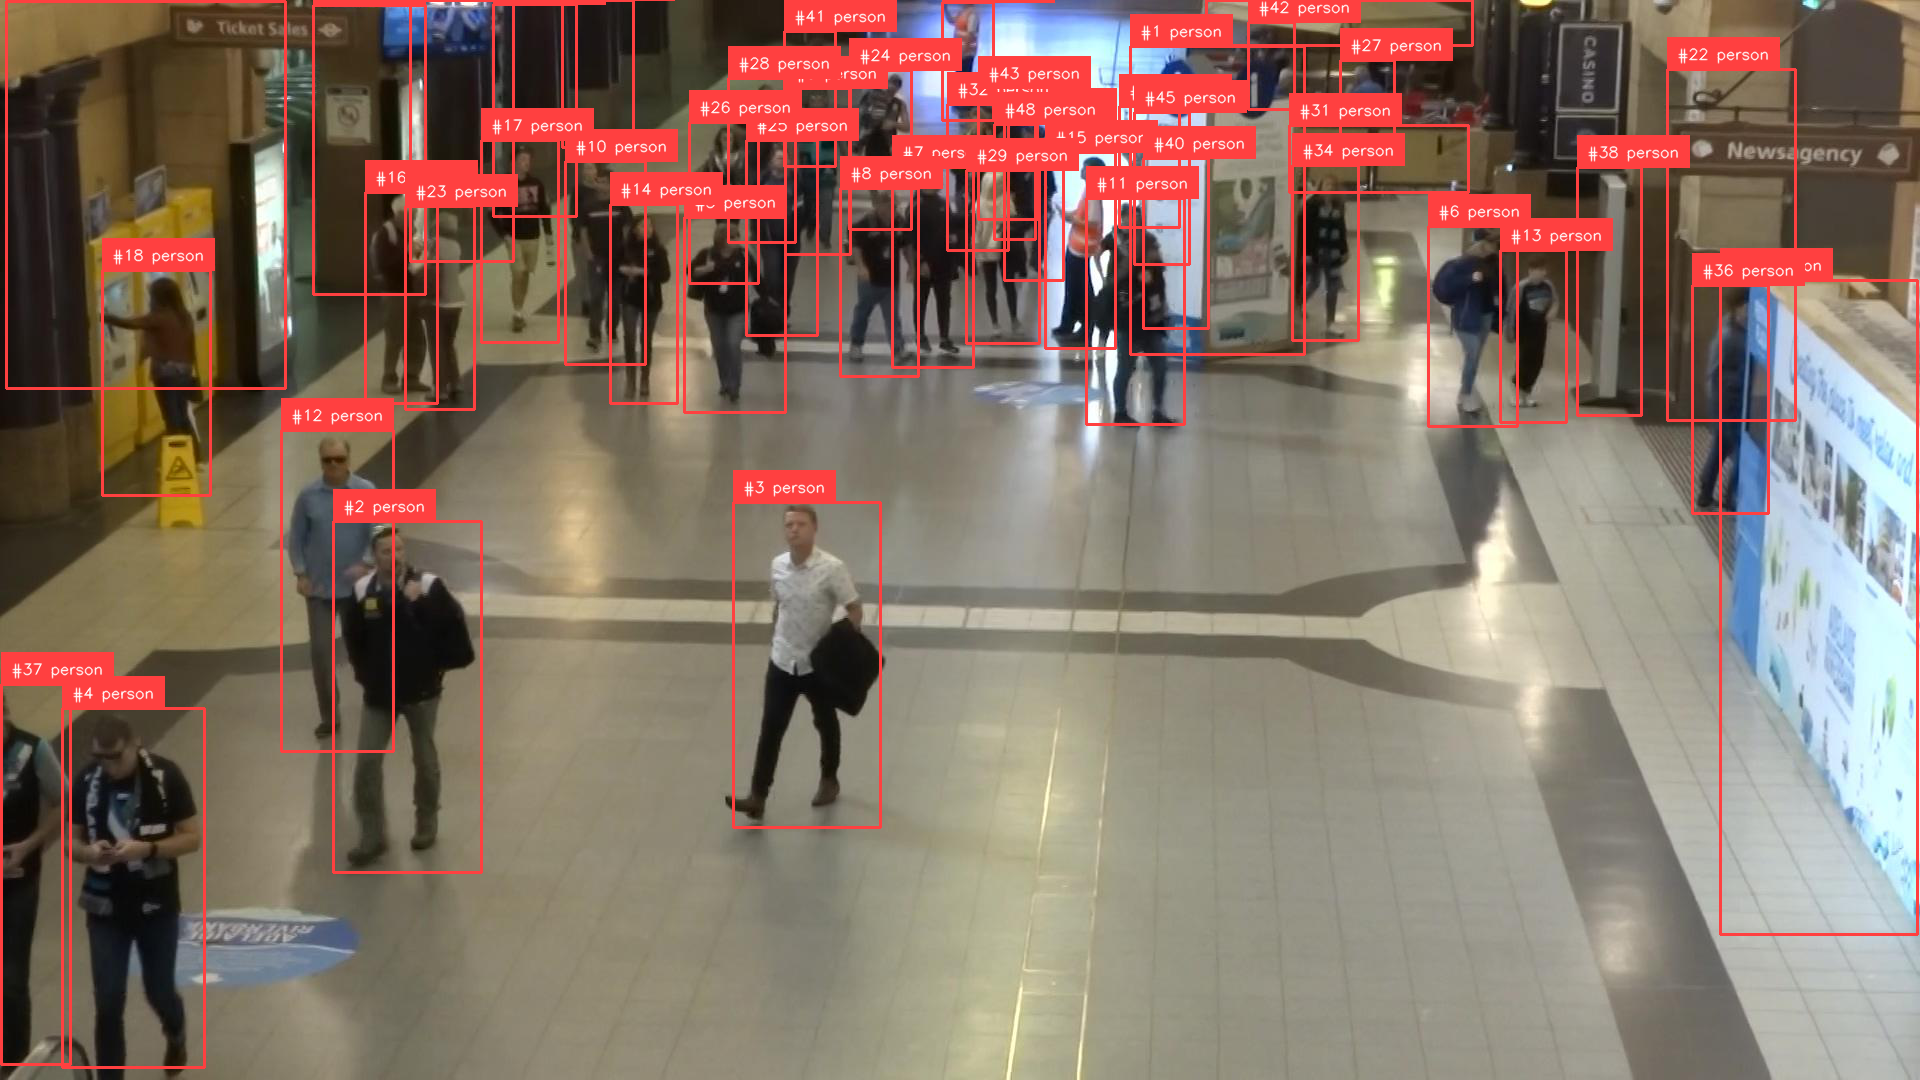

In [30]:
from FasterRcnn.tracking import *

image = get_frame()

tracker = sv.ByteTrack() # to track IDs

results = inference(model, image, device)
detections = get_detections_from_rcnn_results(results)
detections = tracker.update_with_detections(detections)
    
draw_rcnn_detections(detections, image)